# Zad3

In [51]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import sys
sys.path.append('..')
from sklearn.neural_network import MLPClassifier
from NN_helpers import draw_nn
import matplotlib.pyplot as plt
from NN_helpers import draw_response3D

### Punkt 3

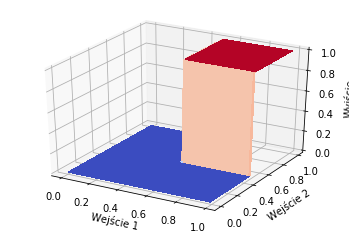

In [57]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
Z = np.zeros((len(X),len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        if X[i]>0.5 and Y[j]>0.5:
            Z[i][j] = 1
            
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('Wejście 1')
ax.set_ylabel('Wejście 2')

ax.set_zlabel('Wyjście')

plt.savefig("Fig.3.3.1.png")

### Punkt 4

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


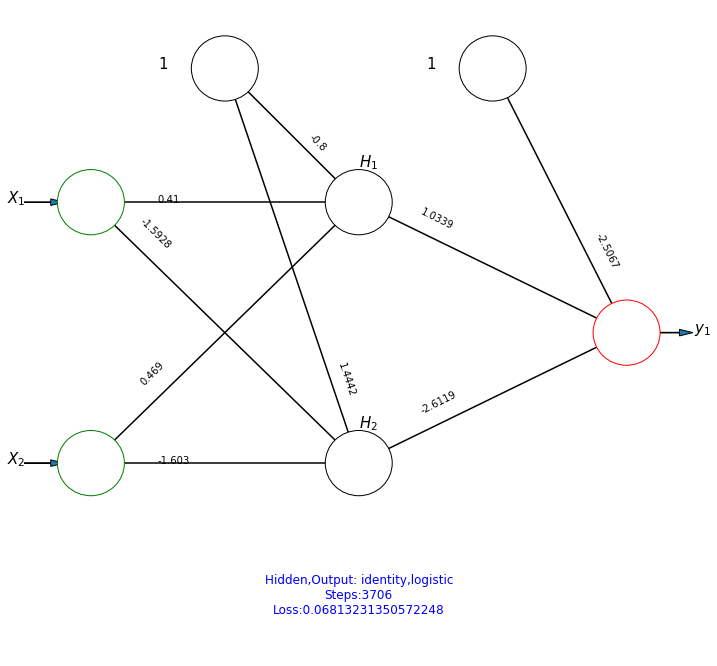

array([0, 0, 0, 1])

In [25]:
def plot_loss(clf, X, y,iters = 2000):
    licz=[] 
    loss=[]
    for i in range(iters):
        clf.fit(X, y)
        licz.append(i)
        loss.append(clf.loss_)
    plt.plot(licz,loss)

def plot_error(clf, X, y,iters = 2000):
    licz=[] 
    error=[]
    for i in range(iters):
        clf.fit(X, y)
        licz.append(i)
        error.append(1-clf.score(X,y))
    plt.plot(licz,error)



X = [[0,0],[0,1],[1,0],[1,1]] 
y = [0, 0, 0, 1] 
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=55, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_nn(clf) 

clf.predict([[0,0],[0,1],[1,0],[1,1]])

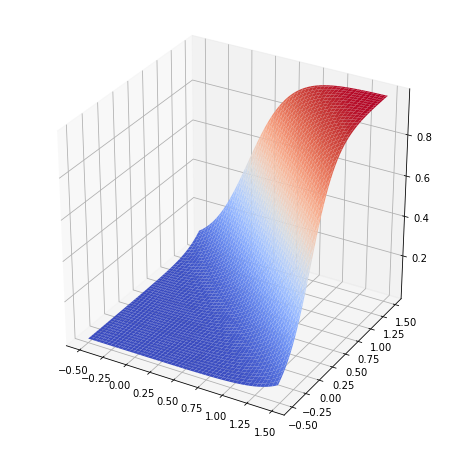

In [26]:
draw_response3D(clf,X,y)

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


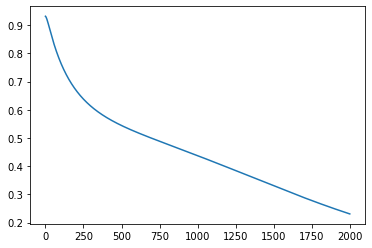

In [27]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=55, max_iter=1, warm_start=True)
plot_loss(clf, X, y)


### Punkt 5

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


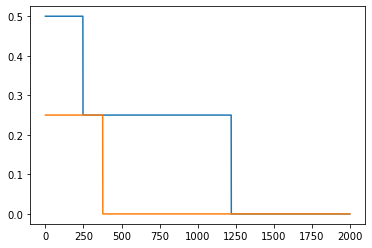

In [28]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=55, max_iter=1, warm_start=True) 
plot_error(clf, X, y)

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2,2,2), activation='identity', random_state=55, max_iter=1, warm_start=True) 
plot_error(clf, X, y)

### Punkt 6

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


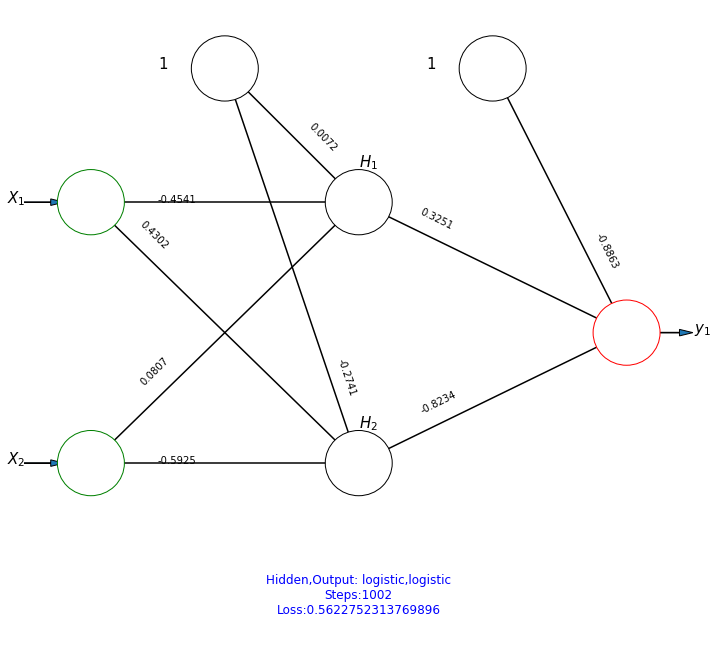

In [29]:
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2),activation='logistic', random_state=55, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_nn(clf) 

### Punkt 7

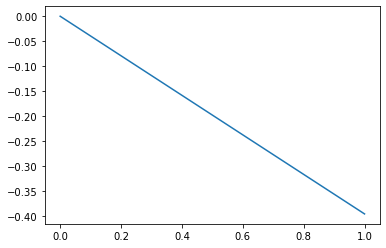

In [30]:
x= np.linspace(0,1,10)
y = [(clf.coefs_[1].flatten()[0]*i)/clf.coefs_[1].flatten()[1] for i in x]

plt.plot(x,y)

### Punkt 9

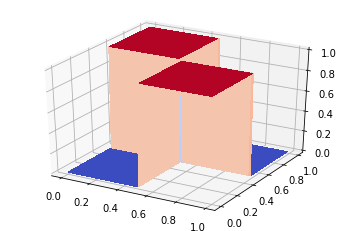

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
Z = np.zeros((len(X),len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        if Y[i]>0.5 and X[j]<0.5:
            Z[i][j] = 1
        if Y[i]<0.5 and X[j]>0.5:
            Z[i][j] = 1
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


plt.show()

### Punkt 10

layer weight matrix shapes: [(2, 2), (2, 1)]
detected layer sizes: [2, 2, 1]


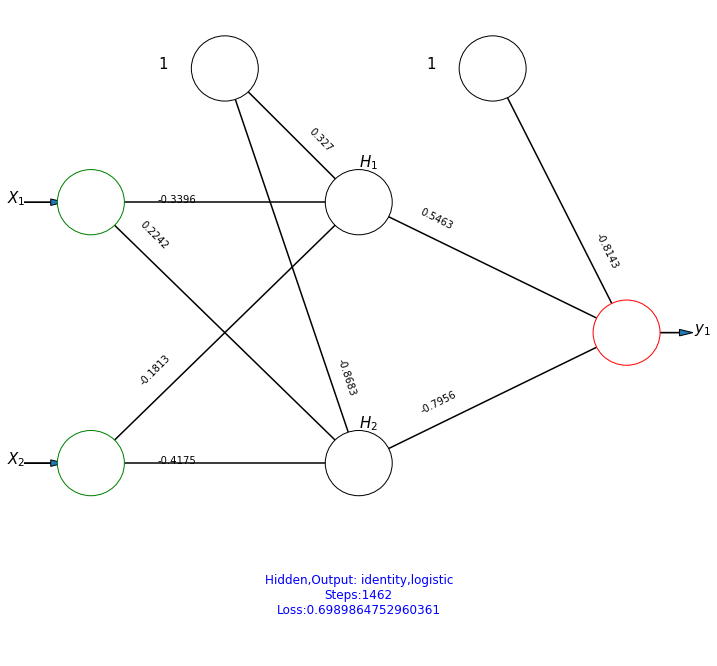

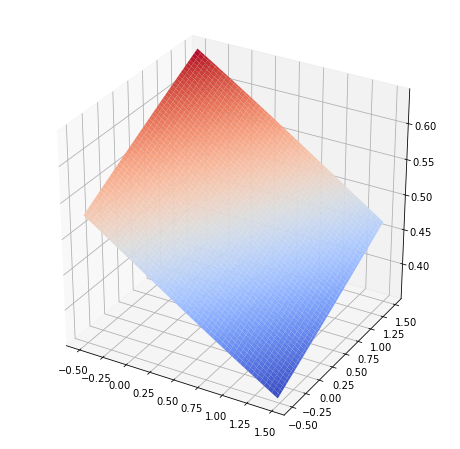

array([1, 1, 0, 0])

In [45]:
X = [[0,0],[0,1],[1,0],[1,1]] 
y = [0, 1, 1, 0] 
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='identity', random_state=55, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_nn(clf) 
draw_response3D(clf,X,y)
clf.predict([[0,0],[0,1],[1,0],[1,1]])


### Punkt 11

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


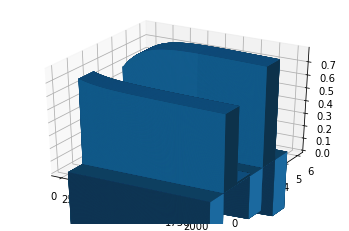

In [46]:
def plot_coefs(clf, in_, out):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    Z=[] 
    Y=[0,1,2,3,4,5]
    X = []
    for i in range(2000):
        clf.fit(in_, out)
        X.append(i)
        Z.append([clf.coefs_[0][0][0],clf.coefs_[0][0][1],clf.coefs_[0][1][0],clf.coefs_[0][1][1],clf.coefs_[1][0][0],clf.coefs_[1][1][0]])

    X, Y = np.meshgrid(X,Y)

    X = X.ravel()
    Y = Y.ravel()
    top = [[],[],[],[],[],[]]
    for i in Z:
        top[0].append(i[0])
        top[1].append(i[1])
        top[2].append(i[2])
        top[3].append(i[3])
        top[4].append(i[4])
        top[5].append(i[5])
    
    top = top[0]+top[1]+top[2]+top[3]+top[4]+top[5]
    

    # Construct arrays with the dimensions for the 16 bars.

    bottom = np.zeros_like(top)

    width = depth = 1
    
    ax.bar3d(X, Y, bottom, width, depth, top, shade=True)
    
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='logistic', random_state=55, max_iter=1, warm_start=True)
plot_coefs(clf, X, y)
    

0  out of  10


c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1  out of  10
2  out of  10
3  out of  10
4  out of  10
5  out of  10
6  out of  10
7  out of  10
8  out of  10
9  out of  10


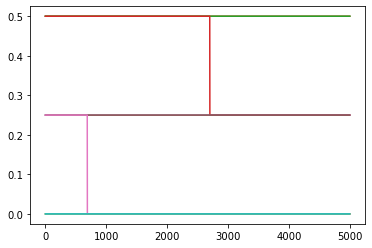

In [50]:
def plot_error_10(X, y):
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2), activation='logistic', max_iter=1, warm_start=True)
    licz=np.zeros(5000)
    error=np.zeros(5000)
    for j in range(10):
        print(j," out of ",10)
        for i in range(5000):
            clf.fit(X, y)
            licz[i]=i
            error[i] += 1-clf.score(X,y)
            
    error = error/10
    plt.plot(licz,error)

plot_error_10(X, y)

### Punk 12

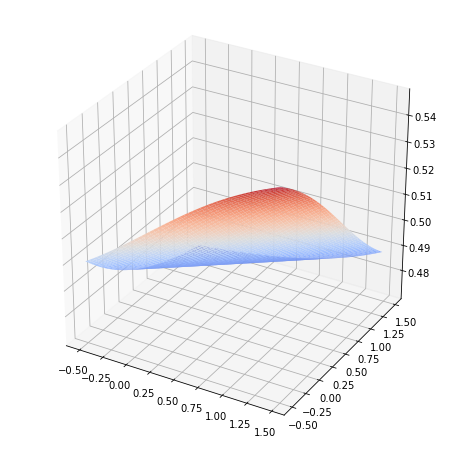

In [35]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(2,2), activation='logistic', random_state=55, 
                    max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_response3D(clf,X,y)

### Punk 13

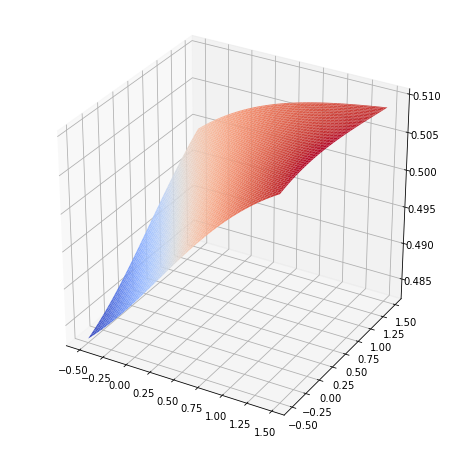

layer weight matrix shapes: [(2, 2), (2, 2), (2, 1)]
detected layer sizes: [2, 2, 2, 1]


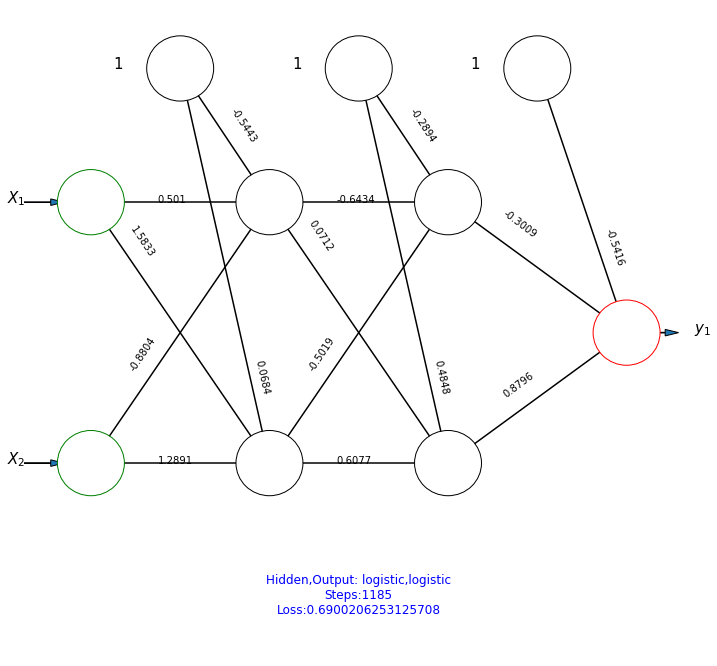

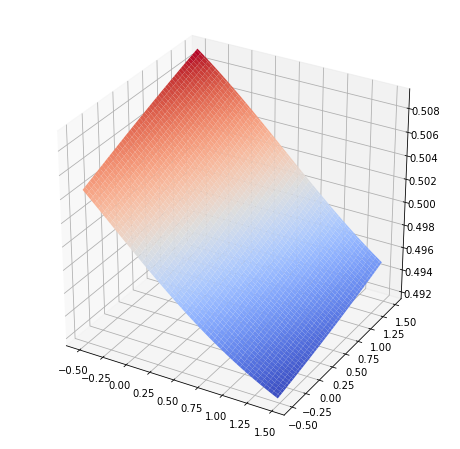

layer weight matrix shapes: [(2, 2), (2, 2), (2, 1)]
detected layer sizes: [2, 2, 2, 1]


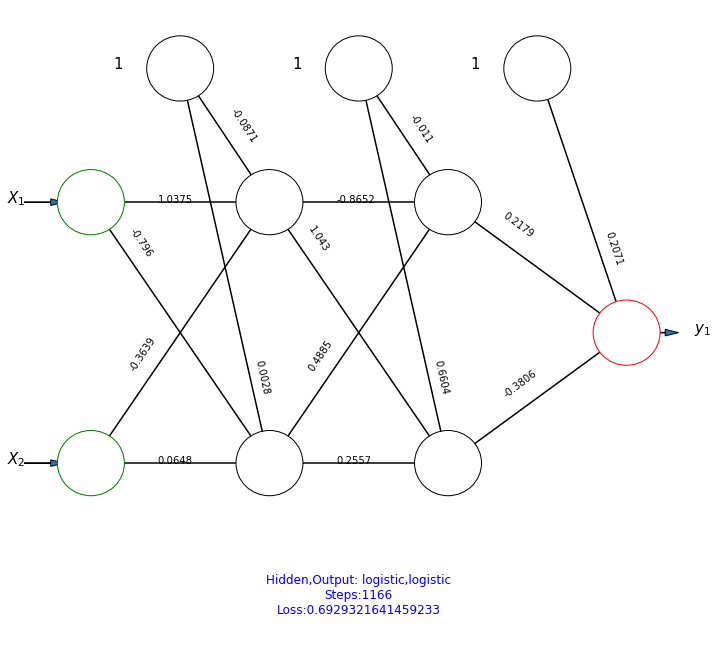

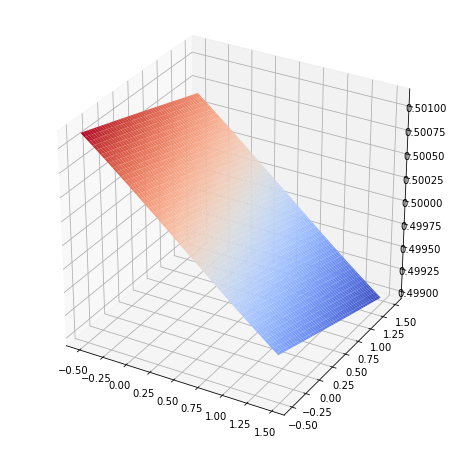

layer weight matrix shapes: [(2, 2), (2, 2), (2, 1)]
detected layer sizes: [2, 2, 2, 1]


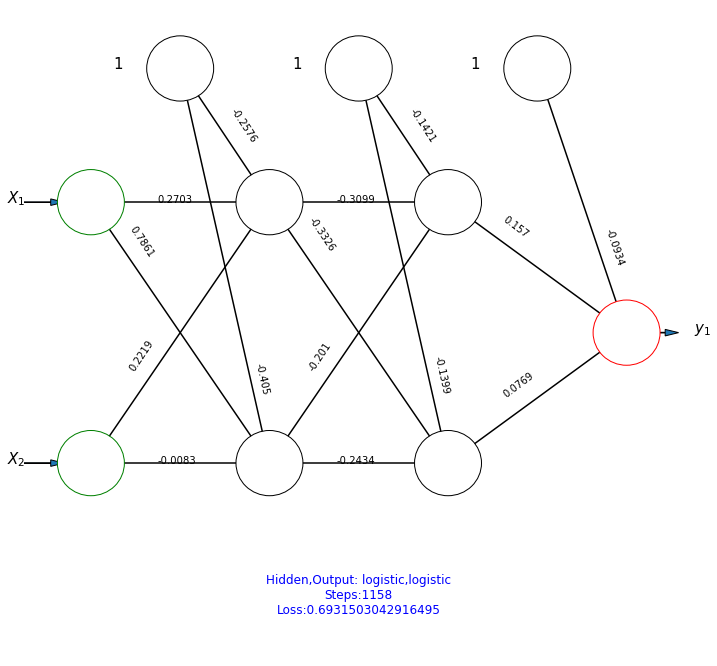

In [36]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(2,2), activation='logistic', random_state=1, max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_response3D(clf,X,y)
draw_nn(clf)

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(2,2), activation='logistic', random_state=52, max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_response3D(clf,X,y)
draw_nn(clf)

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(2,2), activation='logistic', random_state=8, max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 
draw_response3D(clf,X,y)
draw_nn(clf)

### Punk 14

In [37]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(2,2), activation='logistic', random_state=123, max_iter=100000, n_iter_no_change=1000)
clf.fit(X, y) 



MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100000,
              momentum=0.9, n_iter_no_change=1000, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

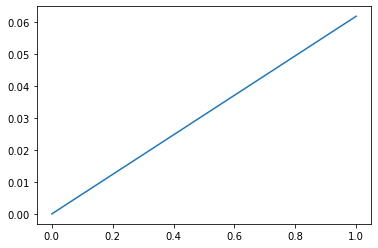

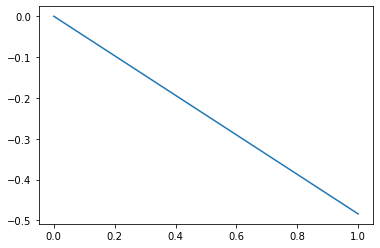

In [38]:
x= np.linspace(0,1,10)
line = [(clf.coefs_[0].flatten()[0]*i)/clf.coefs_[0].flatten()[1] for i in x]

plt.plot(x,line)
plt.show()

line = [(clf.coefs_[0].flatten()[2]*i)/clf.coefs_[0].flatten()[3] for i in x]

plt.plot(x,line)
plt.show()

### Punk 15

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (123) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


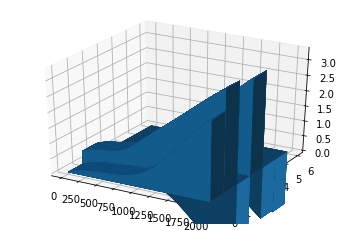

In [39]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(2,2), activation='logistic', random_state=1, max_iter=123, warm_start=True)

#plot_loss_10(clf, X, y)
plot_coefs(clf, X, y)

# Zad 4

In [40]:
from numpy import genfromtxt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bupa_data = genfromtxt('bupa.csv', delimiter=',')
pima_data = genfromtxt('pima-indians-diabetes.csv', delimiter=',')


In [41]:
y = pima_data[:,-1]
X = pima_data[:,:-2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)



c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


layer weight matrix shapes: [(7, 8), (8, 4), (4, 1)]
detected layer sizes: [7, 8, 4, 1]


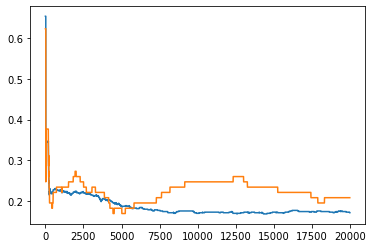

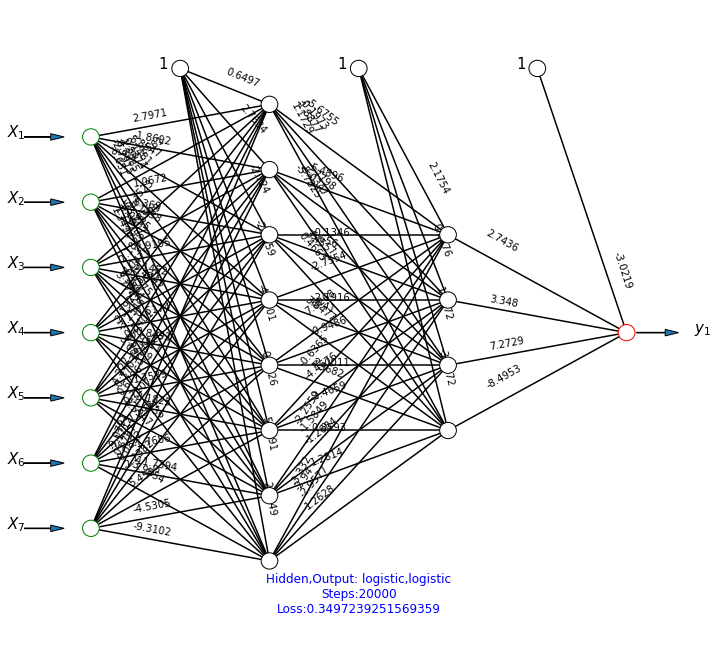

In [42]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(8,4), activation='logistic', random_state=444, max_iter=1, warm_start=True) 
def plot_error_and_predict(clf, X, y,iters = 2000):
    licz=[] 
    error_train=[]
    error_test=[]
    for i in range(iters):
        clf.fit(X, y)
        licz.append(i)
        error_train.append(1-clf.score(X,y))
        error_test.append(1-clf.score(X_test,y_test))
    plt.plot(licz,error_train,error_test)

plot_error_and_predict(clf,X_train,y_train,20000)
draw_nn(clf)


# Zad 5

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 

scaler = StandardScaler()  
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\luk3r\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic 

layer weight matrix shapes: [(4, 4), (4, 13), (13, 3)]
detected layer sizes: [4, 4, 13, 3]


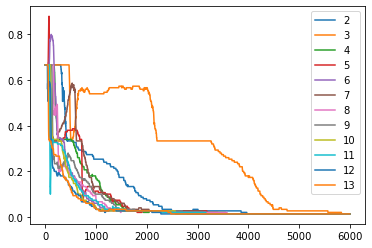

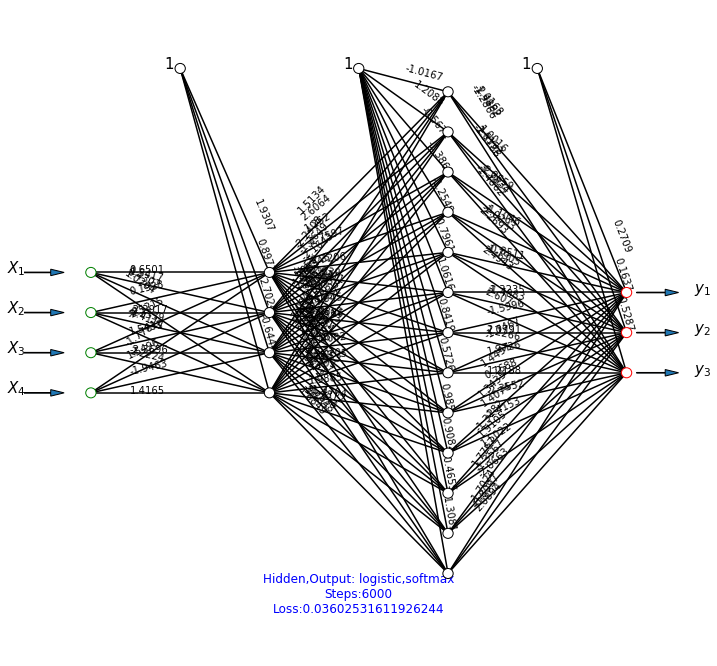

In [44]:
error_global=[]
licz_global=[] 
for i in range(2,14):
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(4,i), activation='logistic', random_state=1, max_iter=1, warm_start=True) 
    licz=[] 
    error=[]
    for j in range(6000):
        clf.fit(X, y)
        licz.append(j)
        error.append(1-clf.score(X,y))
    error_global.append(error)
    licz_global.append(licz)
    plt.plot(licz,error,label = str(i))
plt.legend()
draw_nn(clf)
